# Near PD - Method Comparison

In [11]:
import cProfile
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import time
from numpy.linalg import norm, eig, inv
from scipy.linalg import eigh

import cpd
from cpd.moment_functional import f

np.set_printoptions(linewidth=150, precision=3, suppress=False)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Runtime

In [23]:
# Produce ROC curves for both methods.
methods = ("rco", "tn", "higham")
colors = ("m", "b", "g")

In [50]:
np.random.seed(0)
J =  2 ** np.arange(2, 11)
j_max = 64
num_experiments = 10

num_methods = len(methods)
t = [[] for _ in range(num_methods)]
m = [[] for _ in range(num_methods)]
for j in J: # 2 ** np.arange(2, 5):
    print(j)
    tj = [0] * len(methods)
    mj = [0] * len(methods)
    for i in range(num_experiments):
        if i % max(1, num_experiments // 10) == 0:
            print("\t" + str(i))
        a = np.random.randn(j, j)
        for k, method in enumerate(methods):
            if method != "rco" or j <= j_max:
                result = %timeit -n1 -r1 -o -q b = cpd.near_pd.near_pd(a, method)
                tj[k] += result.average
                mj[k] += result.average ** 2
    for k, method in enumerate(methods):
        mu = tj[k] / num_experiments
        t[k].append(mu)
        m[k].append((mj[k] / num_experiments - mu ** 2) ** 0.5)
t = [np.array(item) for item in t]
m = [np.array(item) for item in m]

4
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
8
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
16
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
32
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
64
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
128
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
256
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
512
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
1024
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9


In [51]:
t, m

([array([ 0.073,  0.303,  0.779,  6.06 , 56.42 ,  0.   ,  0.   ,  0.   ,  0.   ]),
  array([1.516e-03, 2.233e-03, 4.417e-03, 1.125e-02, 2.505e-02, 7.665e-02, 2.134e-01, 8.415e-01, 3.466e+00]),
  array([3.766e-03, 4.663e-03, 7.991e-03, 1.806e-02, 4.470e-02, 3.138e-01, 1.239e+00, 7.436e+00, 2.926e+01])],
 [array([0.023, 0.175, 0.227, 1.313, 7.879, 0.   , 0.   , 0.   , 0.   ]),
  array([0.   , 0.   , 0.   , 0.003, 0.   , 0.025, 0.011, 0.018, 0.133]),
  array([6.216e-04, 4.659e-04, 3.647e-04, 1.665e-03, 1.393e-03, 5.491e-02, 2.056e-02, 2.148e-01, 7.184e-01])])

[ 2.353 -6.169]
[ 1.404 -9.089]
[ 1.705 -9.141]


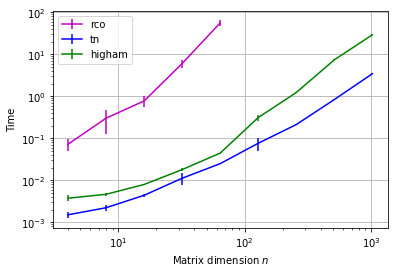

In [56]:
colors = ("m", "b", "g")
ax = plt.subplot(111)
ax.set_xscale("log", nonpositive='clip')
ax.set_yscale("log", nonpositive='clip')
for j, method in enumerate(methods):
    if method == "rco":
        ind = (J <= j_max)
    else:
        ind = np.array([True] * len(J))
    ax.errorbar(J[ind], t[j][ind], m[j][ind], label=method, color=colors[j])
    print(np.polyfit(np.log(J[ind]), np.log(t[j][ind]), 1))
ax.legend();
ax.grid(True);
ax.set_xlabel("Matrix dimension $n$")
ax.set_ylabel("Time");
plt.savefig("near_cpd_timing.png")

In [9]:
print(t0)
print(t1)
print(t0 / t1)

[0.012 0.082 0.287]
[0.004 0.004 0.008]
[ 2.988 18.46  35.998]


In [10]:
print(np.exp(np.diff(np.log(t0))))

[6.759 3.502]


In [153]:
J =  2 ** np.arange(6, 10)
t1 = []
num_experiments = 5
for j in J: # 2 ** np.arange(2, 5):
    print(j)
    tj0 = 0
    for i in range(num_experiments):
        a = np.random.randn(j, j)
        result = %timeit -n1 -r1 -o -q b = cpd.near_pd.higham(a)
        tj1 += result.average
    t1.append(tj1 / num_experiments)
t1 = np.array(t1)

64
128
256
512


ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

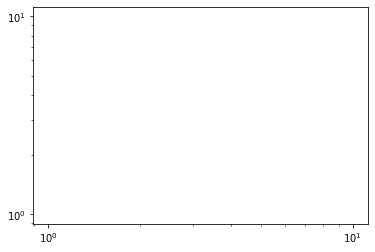

In [12]:
plt.loglog(J, t1, label="near-pd")
plt.grid(True);
plt.xlabel("Matrix dimension")
plt.ylabel("Time")
print(np.polyfit(J, t1, 3))

In [56]:
print(np.exp(np.diff(np.log(t0))))

[ 3.4567 25.2565]


### Accuracy-Stability Tradeoff

In [57]:
#a = a @ a.T
#lam, q = np.linalg.eig(a)
#a = q.T @ np.diag(1 + 100 * np.arange(j)) @ q
#a -= 5 * np.eye(a.shape[0])
#a -= 2 * np.random.randn(j, j)
#print("eig", np.linalg.eig(a)[0])
#a0 = cpd.near_pd.near_pd(a, eig_tol=0)

np.random.seed(0)
#j = 5 #J = np.arange(2, 21)#  
dim = 10
leeway_factor_values = np.array([1.05, 1.1, 1.2])
num_experiments = 10
# Higham = baseline.
methods = ("higham", "rco", "tn")
r = np.zeros((len(methods), len(leeway_factor_values), num_experiments, 2))
print("dim", dim)
for j, leeway_factor in enumerate(leeway_factor_values):
    print("\tleeway_factor", leeway_factor)
    for k in range(num_experiments):
        a = np.random.randn(dim, dim)
        a = a @ a.T
        _, q = np.linalg.eig(a)
        cond = 6 + 4 * np.random.random()
        lam0 = -1e-3
        lam = np.concatenate(([lam0], 10 ** (cond * np.random.random((dim-1, )))))
        a = q.T @ np.diag(lam) @ q
#        a = np.random.randn(dim, dim)
#        a = 0.5 * (a + a.T)
        kappa = np.linalg.cond(a)
        print(lam, kappa)
        for i, method in enumerate(methods):
            if method == "higham":
                a_cpd = a_cpd = cpd.near_pd.higham(a)
            elif method == "rco":
                a_cpd, info = cpd.near_pd.near_pd(a, method, leeway_factor=leeway_factor)
                kappa_rco = np.linalg.cond(a_cpd)
            elif method == "tn":
                a_cpd = cpd.near_pd.tn(a, kappa_rco)

            r[i, j, k] = [norm(a_cpd - a) / norm(a), np.linalg.cond(a_cpd)]
            #print(method, np.linalg.cond(a_cpd))
            
# Higham = baseline.
r0 = r[0]

dim 10
	leeway_factor 1.05
[-1.000e-03  4.639e+04  1.405e+00  2.093e+02  1.203e+05  1.707e+02  5.700e+04  1.993e+03  1.103e+01  1.974e+02] 120313060.10583012
[-1.000e-03  4.855e+08  2.245e+03  3.382e+09  1.978e+02  2.557e+09  2.133e+09  8.319e+07  1.769e+06  4.615e+08] 3381498475380.7256
[-1.000e-03  5.019e+01  3.089e+04  1.744e+00  1.300e+00  1.359e+03  3.143e+00  6.932e+01  4.130e+01  7.080e+01] 30886797.764486484
[-1.000e-03  4.840e+02  2.279e+06  6.050e+00  3.578e+03  1.514e+04  3.792e+05  5.378e+00  6.777e+01  1.988e+03] 2279003404.678109
[-1.000e-03  1.347e+00  3.191e+03  5.001e+05  3.340e+02  3.214e+01  3.504e+00  3.775e+00  3.142e+01  4.746e+00] 500129788.87730455
[-1.000e-03  4.795e+05  1.720e+07  1.871e+04  1.422e+08  2.753e+00  4.075e+02  2.356e+06  5.321e+03  3.477e+01] 142183692113.7797
[-1.000e-03  8.708e+04  5.686e+09  8.406e+01  1.655e+05  6.790e+02  9.284e+02  5.845e+05  9.837e+08  7.189e+07] 5685122971955.661
[-1.000e-03  7.676e+02  2.734e+02  1.303e+01  1.015e+03  6.

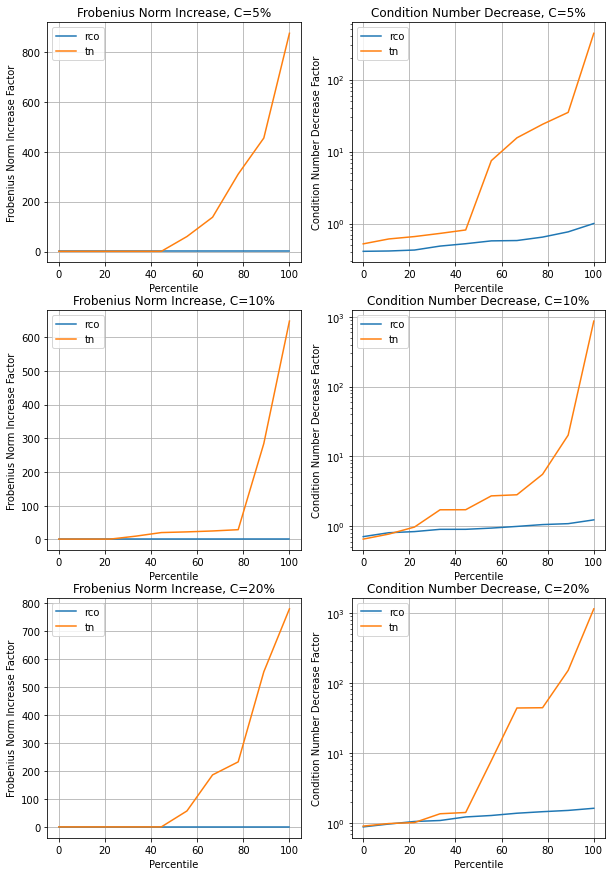

In [58]:
fig, axs = plt.subplots(len(leeway_factor_values), 2, figsize=(10, 5 * len(leeway_factor_values)))
percentile = np.linspace(0, 100, num_experiments)

for j, leeway_factor in enumerate(leeway_factor_values):
    ax = axs[j, 0]
    for i, method in enumerate(methods[1:]):
        ax.plot(percentile, np.sort(r[i, j, :, 0] / r0[j, :, 0]), label=method)
    ax.grid(True);
    ax.set_xlabel("Percentile")
    ax.set_ylabel("Frobenius Norm Increase Factor")
    #ax.set_ylim([0.99, 1.01 * np.max(r[i, j, :, 0] / r0[i, j, 0])])
    ax.set_title("Frobenius Norm Increase, C={:.0f}%".format(100 * (leeway_factor - 1)))
    ax.legend();

    ax = axs[j, 1]
    for i, method in enumerate(methods[1:]):
        ax.semilogy(percentile, np.sort(r0[i, j, 1] / r[i, j, :, 1]), label=method)
    ax.grid(True);
    ax.set_xlabel("Percentile")
    ax.set_ylabel("Condition Number Decrease Factor")
    #ax.set_ylim([0.99, 1.01 * np.max(r0[i, j, 1] / r[i, j, :, 1])])
    ax.set_title("Condition Number Decrease, C={:.0f}%".format(100 * (leeway_factor - 1)))
    ax.legend();

In [252]:
dim = 10
np.random.seed(0)
a = np.random.randn(dim, dim)
a = a @ a.T
_, q = np.linalg.eig(a)
cond = 10
lam0 = -1e-3
leeway_factor=1.1
lam = np.concatenate(([lam0], 10 ** (cond * np.random.random((dim-1, )))))
a = q.T @ np.diag(lam) @ q
print("norm", norm(a))
print(lam)
print(kappa)
info_rco = cpd.near_pd.near_pd(a, "rco", leeway_factor=leeway_factor)[1]
info_tn = cpd.near_pd.near_pd(a, "tn", leeway_factor=leeway_factor)[1]
print("rco", info_rco.curve)
print("tn", info_tn.curve)

norm 4428500.703574357
[-1.000e-03  1.732e+04  1.159e+06  1.556e+00  1.037e+03  3.997e+06  7.957e+02  1.514e+06  1.939e+04  2.263e+01]
55725773673.30302
103259402551.24435 4428500.703574357 2.302585092994047
rco [[4.484e+08 9.250e-01 1.001e+00]
 [4.484e+06 9.250e-01 1.000e+00]
 [4.484e+04 9.250e-01 1.000e+00]
 [4.484e+02 8.769e-01 1.006e+00]
 [4.484e+00 7.008e-01 2.216e+00]
 [4.484e-02 1.405e-01 1.917e+01]
 [4.484e-04 7.656e-02 5.205e+01]
 [4.484e-06 7.656e-02 5.205e+01]
 [0.000e+00 4.975e-05 5.737e+04]]
tn [[3.997e+11 2.281e-10 3.997e+11]
 [1.948e+09 6.891e-10 1.948e+09]
 [9.497e+06 9.526e-08 9.497e+06]
 [4.629e+04 3.088e-05 4.629e+04]
 [2.257e+02 8.759e-03 2.257e+02]]


### How closely is a symmetric, [near-]positive definite matrix reproduced?
Looking at the tradeoff between Frobenius norm and condition number when a matrix is symmetric, and has one small negative eigenvalues.

In [131]:
np.random.seed(0)

dim_values = np.array([16, 32])
cond = 1000
lam0_values = np.array([1e-3, 1e-1, -1e-3, -1]) #-np.logspace(-1, 3, base=0.1, num=4)
methods = ("rco", "tn", "higham")
curves = [[[None] * len(lam0_values) for _ in range(len(methods))] for _ in range(len(dim_values))]

for k, dim in enumerate(dim_values):
    print("dim", dim)
    for j, lam0 in enumerate(lam0_values):
        print("lam0", lam0)
        # Create a matrix with eigenvalues from 1..cond.
        a = np.random.randn(dim, dim)
        a = a @ a.T
        _, q = np.linalg.eig(a)
        lam = np.logspace(0, np.log10(cond), num=dim, base=10)
        lam[0] = lam0
        a = q.T @ np.diag(lam) @ q
        for i, method in enumerate(methods):
            curves[k][i][j] = cpd.near_pd.near_pd(a, method, num_alpha=20, alpha_step=0.2)[1].curve

dim 16
lam0 0.001
lam0 0.1
lam0 -0.001
lam0 -1.0
dim 32
lam0 0.001
lam0 0.1
lam0 -0.001
lam0 -1.0


In [128]:
def pretty_print(x, n):
    """
    % pretty-print a value in scientific notation
    % usage: s=pp(x,n)
    % where: x a floating-point value
    %        n is the number of decimal places desired
    %        s is the string representation of x with n decimal places, and
    %          exponent k
    """
    exponent = int(np.floor(np.log10(np.abs(x)))) #to accomodate for negative values
    mantissa = x / (10 ** exponent)
    m = ("%{}.{}f".format(n + 2, n)) % (mantissa, )
    return '{} \\times 10^{{{}}}'.format(m, exponent)
    # returns something like '$1.42 \times 10^{-1}$'

In [129]:
pretty_print(0.0001424234334, 3)

'1.424 \\times 10^{-4}'

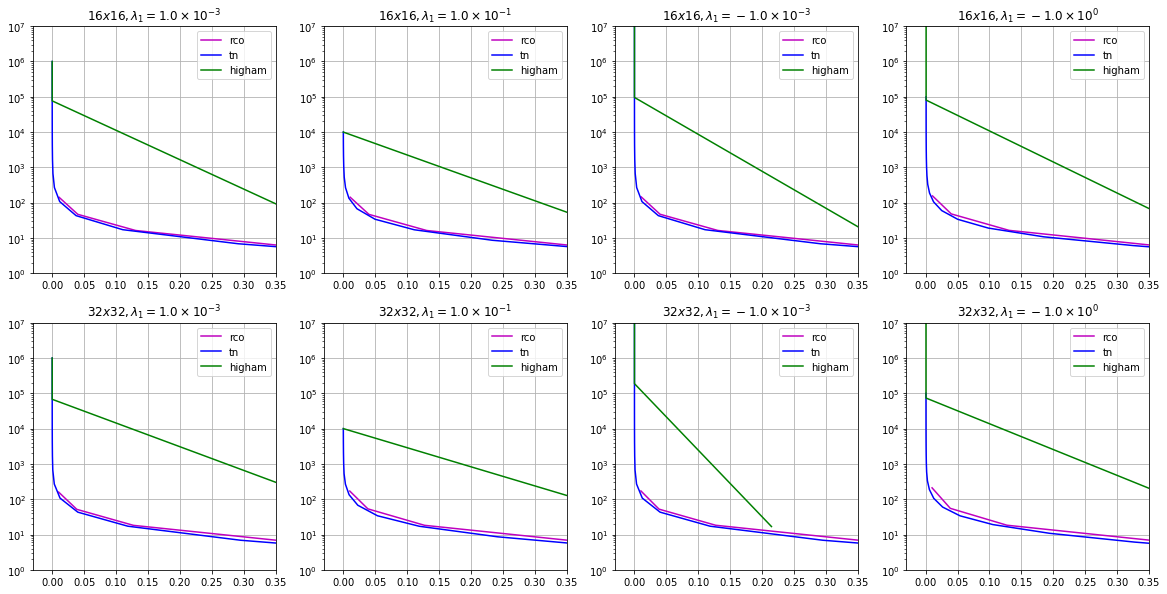

In [132]:
fig, axs = plt.subplots(len(dim_values), len(lam0_values), figsize=(5 * len(lam0_values), 5 * len(dim_values)))
for k, dim in enumerate(dim_values):
    for j, lam0 in enumerate(lam0_values):
        ax = axs[k][j]
        for i, method in enumerate(methods):
            ax.semilogy(curves[k][i][j][:, 1], curves[k][i][j][:, 2], label=method, color=colors[i])
        ax.set_title("${} x {}, \lambda_1={}$".format(dim, dim, pretty_print(lam0, 1)))
        ax.set_xlim([-0.03, 0.35])
        ax.set_ylim([1, 1e7])
        ax.grid(True);
        ax.legend();

In [134]:
for k, dim in enumerate(dim_values):
    for j, lam0 in enumerate(lam0_values):
        for i, method in enumerate(methods):
            plt.semilogy(curves[k][i][j][:, 1], curves[k][i][j][:, 2], label=method, color=colors[i])
        plt.title("${} x {}, \lambda_1={}$".format(dim, dim, pretty_print(lam0, 1)))
        plt.xlim([-0.03, 0.35])
        plt.ylim([1, 1e7])
        plt.grid(True);
        plt.legend();
        plt.savefig("near_cpd_roc_{}_{}.png".format(k + 1, j + 1))
        plt.clf()

<Figure size 432x288 with 0 Axes>

## Spectrum Comparison

In [91]:
dim = 10
cond = 10000
#methods = ("higham", "rco", "tn")

# Create a matrix with eigenvalues from 1..cond.
a = np.random.randn(dim, dim)
a = a @ a.T
_, q = np.linalg.eig(a)
lam = np.logspace(0, np.log10(cond), num=dim, base=10)
lam[0] = -1000
lam[1] = -100
lam[2] = -10
a = q.T @ np.diag(lam) @ q

lam = np.sort(lam)
print(lam)
l = [None] * len(methods)
l[2] = np.sort(np.real(np.linalg.eig(cpd.near_pd.higham(a, eig_tol=0))[0]))

a_cpd = cpd.near_pd.near_pd(a, "rco")[0]
l[0] = np.sort(np.real(np.linalg.eig(a_cpd)[0]))

kappa1 = np.linalg.cond(a_cpd)
print(kappa1)
a_tn = cpd.near_pd.tn(a, kappa=kappa1)
l[1] = np.sort(np.real(np.linalg.eig(a_tn)[0]))
print(np.linalg.cond(a_tn))

[-1000.     -100.      -10.       21.544    59.948   166.81    464.159  1291.55   3593.814 10000.   ]
1807.2887832032006
1807.2887832033007


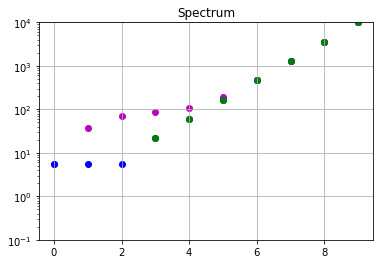

In [98]:
for i, method in enumerate(methods):
    plt.scatter(np.arange(dim), l[i], label=method, color=colors[i])
plt.title("Spectrum")
plt.grid(True);
#plt.legend(loc="lower right");
plt.yscale("log")
plt.ylim([1e-1, 1e4])
plt.savefig("spectrum_comparison.png")

In [96]:
np.set_printoptions(suppress=True)
print(np.array(l))
print((l - lam) / lam)

[[    5.531    38.024    69.344    85.624   109.659   193.796   472.683  1292.47   3592.208  9996.884]
 [    5.533     5.533     5.533    21.544    59.948   166.81    464.159  1291.55   3593.814  9999.377]
 [   -0.       -0.        0.       21.544    59.948   166.81    464.159  1291.55   3593.814 10000.   ]]
[[-1.006 -1.38  -7.934  2.974  0.829  0.162  0.018  0.001 -0.    -0.   ]
 [-1.006 -1.055 -1.553 -0.     0.     0.     0.     0.     0.    -0.   ]
 [-1.    -1.    -1.     0.    -0.     0.    -0.    -0.     0.     0.   ]]


For Near PD, look like RCO is equivalent to a regularized TN method, where wee add a constant to all positive eigenvalue of the TN result.